In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
G1 = nx.DiGraph()
# Add Nodes
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)

In [4]:
G1.add_edge(1, 2)
G1.add_edge(1, 3)
G1.add_edge(1, 4)
G1.add_edge(5, 4)
G1.add_edge(1, 5)

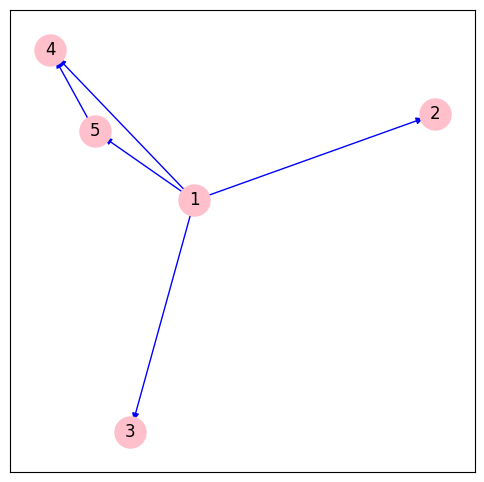

In [7]:
plt.figure(figsize=(6,6))
pos=nx.spring_layout(G1)
nx.draw_networkx_nodes(G1, pos, node_color='pink', node_size=500)
nx.draw_networkx_edges(G1, pos, edge_color='blue', arrows=True)
nx.draw_networkx_labels(G1, pos)

plt.show()

In [8]:
df = pd.read_csv('social_media.csv')
df.head()

,user_name,follows_who,days
0,Anne,Carmen,200
1,Betty,Carmen,20
2,Carmen,Dillan,30
3,Jessica,Carmen,100
4,Dillan,Carmen,50


In [9]:
G2 = nx.DiGraph()

In [10]:
G2 = nx.from_pandas_edgelist(df, source='user_name', target='follows_who',
                             edge_attr='days')
nodelist = G2.nodes()
print(nodelist)

['Anne', 'Carmen', 'Betty', 'Dillan', 'Jessica', 'Keth']


In [11]:
weights = list(nx.get_edge_attributes(G2, 'days').values())
weights = [i/50 for i in weights]
weights

[4.0, 0.6, 0.4, 1.0, 2.0, 2.0]

In [12]:
degree_info = nx.degree(G2)
degree_info

DegreeView({'Anne': 2, 'Carmen': 4, 'Betty': 1, 'Dillan': 3, 'Jessica': 1, 'Keth': 1})

In [13]:
scaled_degree = [degree_info[1]*200 for degree_info in nx.degree(G2)]
scaled_degree

[400, 800, 200, 600, 200, 200]

In [17]:
new_degree = [i*5 for i in scaled_degree]
new_degree

[2000, 4000, 1000, 3000, 1000, 1000]

In [18]:
pos = nx.spring_layout(G2)

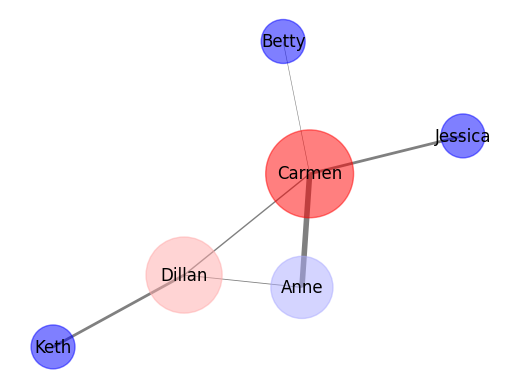

In [20]:
nx.draw_networkx_nodes(G2, pos, node_color=scaled_degree, cmap='bwr', alpha=0.5,
                       node_size=new_degree)
nx.draw_networkx_edges(G2, pos, width=weights, edge_color='grey')
nx.draw_networkx_labels(G2, pos, font_color='black')
plt.axis('off')
plt.show()